# Unsupervised Learning Challenge: Clustering and Dimensionality Reduction

In [30]:
import pandas as pd
import numpy as np

In [31]:
data = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [32]:
print('Shape', data.shape)
print(data['InvoiceNo'].nunique(), 'unique invoices')
print(data['StockCode'].nunique(), 'unique stock items')
print(data['CustomerID'].nunique(), 'unique customers')
print(data['Country'].nunique(), 'unique countries')

Shape (541909, 8)
25900 unique invoices
4070 unique stock items
4372 unique customers
38 unique countries


In [33]:
data['TotalPrice'] = data['UnitPrice'] * data['Quantity']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [34]:
data.groupby(by=['CustomerID','InvoiceNo','StockCode']).sum()

Quantity  UnitPrice  TotalPrice
CustomerID InvoiceNo StockCode                                 
12346.0    541431    23166         74215       1.04    77183.60
           C541433   23166        -74215       1.04   -77183.60
12347.0    537626    20780            12       4.65       55.80
                     20782             6       5.49       32.94
                     21064             6       5.95       35.70
...                                  ...        ...         ...
18287.0    570715    85039A           48       1.45       69.60
                     85039B           48       1.45       69.60
           573167    21014            24       0.29        6.96
                     21824            48       0.39       18.72
                     23264            36       1.25       45.00

[396681 rows x 3 columns]

In [35]:
customers_sum = data.groupby(by='CustomerID').sum().rename(lambda x: f'{x}Sum' if x != 'CustomerID' else x, axis=1)
customers_max = data.groupby(by='CustomerID').max().rename(lambda x: f'{x}Max' if x != 'CustomerID' else x, axis=1)
customers_min = data.groupby(by='CustomerID').min().rename(lambda x: f'{x}Min' if x != 'CustomerID' else x, axis=1)
customers_avg = data.groupby(by='CustomerID').mean().rename(lambda x: f'{x}Avg' if x != 'CustomerID' else x, axis=1)
customers_mode = data.groupby(by='CustomerID').agg(lambda x:x.value_counts().index[0]).rename(lambda x: f'{x}Mode' if x != 'CustomerID' else x, axis=1)
customers_joined = customers_sum.merge(customers_max, on='CustomerID')
customers_joined = customers_joined.merge(customers_min, on='CustomerID')
customers_joined = customers_joined.merge(customers_avg, on='CustomerID')
customers_joined = customers_joined.merge(customers_mode, on='CustomerID')

In [36]:
customers_joined.columns

Index(['QuantitySum', 'UnitPriceSum', 'TotalPriceSum', 'DescriptionMax',
       'QuantityMax', 'InvoiceDateMax', 'UnitPriceMax', 'CountryMax',
       'TotalPriceMax', 'DescriptionMin', 'QuantityMin', 'InvoiceDateMin',
       'UnitPriceMin', 'CountryMin', 'TotalPriceMin', 'QuantityAvg',
       'UnitPriceAvg', 'TotalPriceAvg', 'InvoiceNoMode', 'StockCodeMode',
       'DescriptionMode', 'QuantityMode', 'InvoiceDateMode', 'UnitPriceMode',
       'CountryMode', 'TotalPriceMode'],
      dtype='object')

In [37]:
customers_joined.filter(like='InvoiceNo')

,InvoiceNoMode
CustomerID,
12346.0,541431
12347.0,573511
12348.0,539318
12349.0,577609
12350.0,543037
...,...
18280.0,545712
18281.0,556464
18282.0,562525


In [38]:
drop_cols = ['DescriptionMax', 'DescriptionMin', 'DescriptionMode', 'CountryMin', 'CountryMax', 'InvoiceNoMode', 'StockCodeMode']

rename_cols = {
    'CountryMode': 'Country',
    'InvoiceDateMax': 'LastOrderDate',
    'InvoiceDateMin': 'FirstOrderDate'
}

customers = customers_joined.drop(drop_cols, axis=1).rename(rename_cols, axis=1)
customers

,QuantitySum,UnitPriceSum,TotalPriceSum,QuantityMax,LastOrderDate,UnitPriceMax,TotalPriceMax,QuantityMin,FirstOrderDate,UnitPriceMin,TotalPriceMin,QuantityAvg,UnitPriceAvg,TotalPriceAvg,QuantityMode,InvoiceDateMode,UnitPriceMode,Country,TotalPriceMode
CustomerID,,,,,,,,,,,,,,,,,,,
12346.0,0,2.08,0.00,74215,2011-01-18 10:17:00,1.04,77183.60,-74215,2011-01-18 10:01:00,1.04,-77183.60,0.000000,1.040000,0.000000,74215,2011-01-18 10:17:00,1.04,United Kingdom,-77183.60
12347.0,2458,481.21,4310.00,240,2011-12-07 15:52:00,12.75,249.60,2,2010-12-07 14:57:00,0.25,5.04,13.505495,2.644011,23.681319,12,2011-10-31 12:25:00,3.75,Iceland,15.00
12348.0,2341,178.71,1797.24,144,2011-09-25 13:13:00,40.00,240.00,1,2010-12-16 19:09:00,0.29,13.20,75.516129,5.764839,57.975484,144,2010-12-16 19:09:00,0.29,Finland,41.76
12349.0,631,605.10,1757.55,36,2011-11-21 09:51:00,300.00,300.00,1,2011-11-21 09:51:00,0.42,6.64,8.643836,8.289041,24.076027,12,2011-11-21 09:51:00,1.65,Italy,19.80
12350.0,197,65.30,334.40,24,2011-02-02 16:01:00,40.00,40.00,1,2011-02-02 16:01:00,0.85,8.50,11.588235,3.841176,19.670588,12,2011-02-02 16:01:00,2.10,Norway,25.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,45,47.65,180.60,8,2011-03-07 09:52:00,9.95,23.70,2,2011-03-07 09:52:00,2.55,14.85,4.500000,4.765000,18.060000,6,2011-03-07 09:52:00,2.95,United Kingdom,17.70
18281.0,54,39.36,80.82,12,2011-06-12 10:53:00,16.95,16.95,1,2011-06-12 10:53:00,0.42,5.04,7.714286,5.622857,11.545714,12,2011-06-12 10:53:00,0.42,United Kingdom,5.04
18282.0,98,62.68,176.60,48,2011-12-02 11:43:00,12.75,25.50,-5,2011-08-05 13:35:00,0.29,-1.45,7.538462,4.821538,13.584615,6,2011-08-05 13:35:00,12.75,United Kingdom,17.70


In [39]:
number_columns = customers.select_dtypes('number').columns

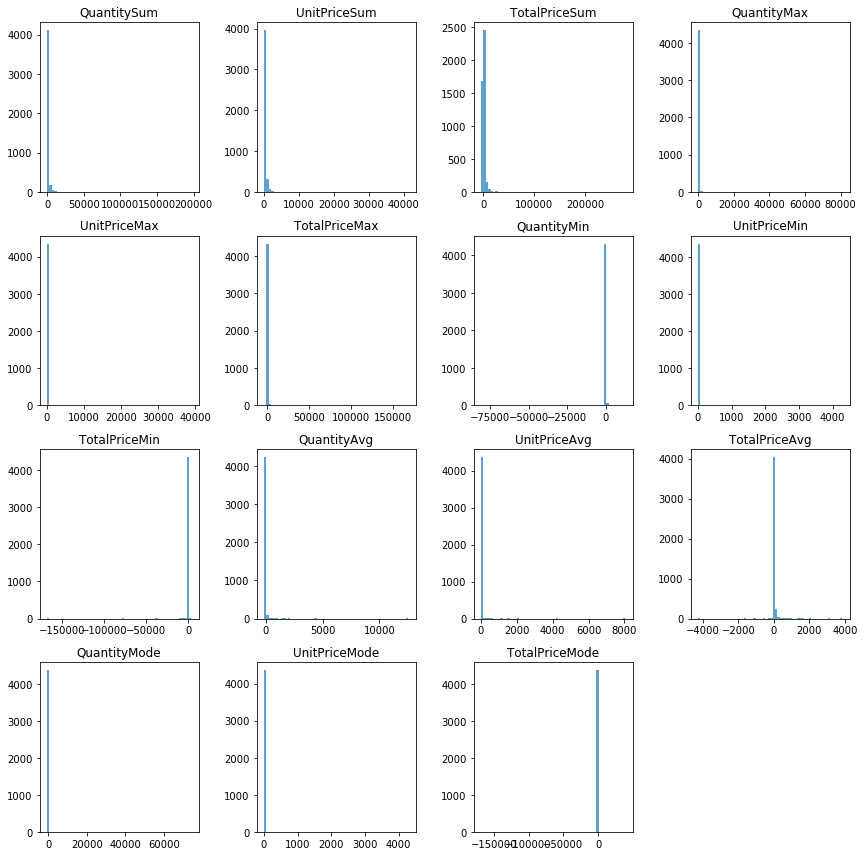

In [40]:
from math import sqrt
import matplotlib.pyplot as plt

def get_ceiling_sq(num):
    sq = sqrt(num)
    if sq != int(sq):
        sq = int(sq) + 1
    return sq

sq = get_ceiling_sq(len(number_columns))
plt.figure(figsize=(3*sq, 3*sq))

for i, col in enumerate(number_columns, 1):
    plt.subplot(sq, sq, i)
    plt.hist(customers[col], bins=60, alpha=.7)
    plt.title(col)

plt.tight_layout()
plt.show()

It seems there are very serious outliers here. Let's try some techniques to handle them

In [41]:
# Look for nulls
print('Total nulls:', customers.isna().sum().sum())
print('---------------------------')

#Look for repeats
print('Total repeats:', customers.duplicated().sum())
print('---------------------------')

# Look for outliers
print('Outliers:')
IQR_THRES = 3.0

if 'outlier' in customers.columns:
    customers.drop('outlier', axis=1, inplace=True)

customers['outlier'] = 0

for col in customers.select_dtypes('number').columns:
    q75, q25 = np.percentile(customers[col], [75,25])
    ranged = q75 - q25

    min_val = q25 - (ranged*IQR_THRES)
    max_val = q75 + (ranged*IQR_THRES)
    
    print('{0:.2f}% -'.format(customers[col].loc[(customers[col] > max_val) | (customers[col] < min_val)].count()/customers[col].count()*100), col)

    customers.loc[customers[col] > max_val, 'outlier'] += 1
    customers.loc[customers[col] < min_val, 'outlier'] += -1

Total nulls: 0
---------------------------
Total repeats: 0
---------------------------
Outliers:
5.08% - QuantitySum
4.73% - UnitPriceSum
5.22% - TotalPriceSum
5.54% - QuantityMax
5.17% - UnitPriceMax
5.88% - TotalPriceMax
10.41% - QuantityMin
4.48% - UnitPriceMin
7.53% - TotalPriceMin
5.90% - QuantityAvg
2.72% - UnitPriceAvg
7.48% - TotalPriceAvg
4.85% - QuantityMode
3.71% - UnitPriceMode
8.60% - TotalPriceMode
29.00% - outlier


In [42]:
customers.loc[customers['outlier'] < 0, 'outlier'] = -1
customers.loc[customers['outlier'] > 0, 'outlier'] = 1
customers['outlier'].value_counts()

 0    3104
 1    1068
-1     200
Name: outlier, dtype: int64

In [43]:
customers_mid = customers.loc[customers['outlier'] == 0]
customers_low = customers.loc[customers['outlier'] < 0]
customers_high = customers.loc[customers['outlier'] > 0]

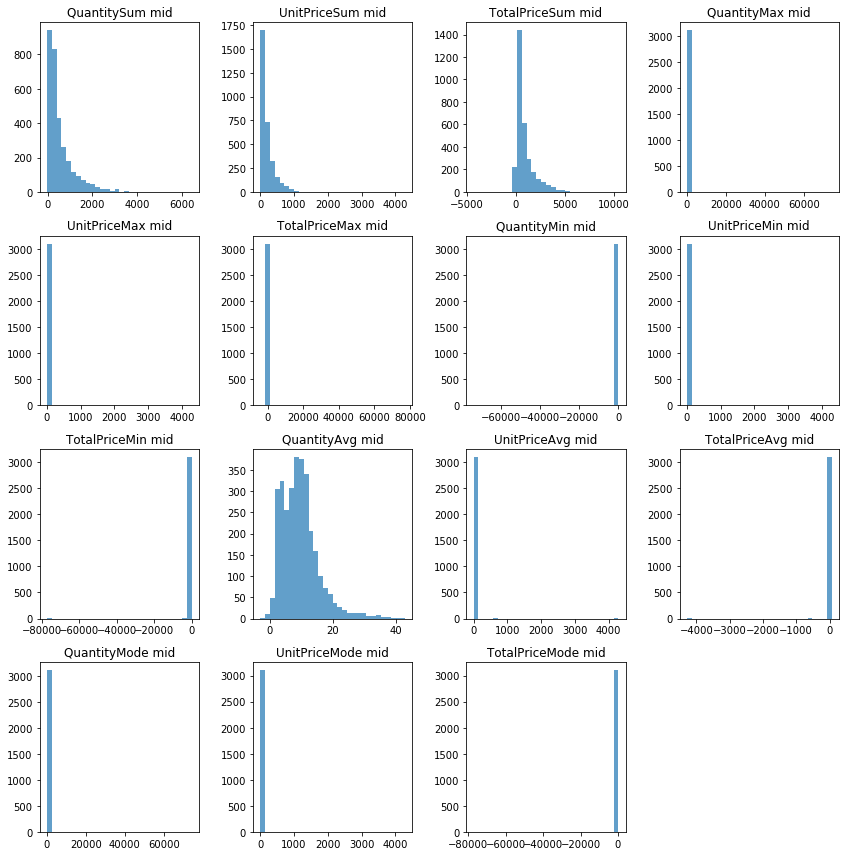

In [44]:
plt.figure(figsize=(3*sq, 3*sq))

for i, col in enumerate(number_columns, 1):
    plt.subplot(sq, sq, i)
    plt.hist(customers_mid[col], bins=30, alpha=.7)
    plt.title(f'{col} mid')

plt.tight_layout()
plt.show()

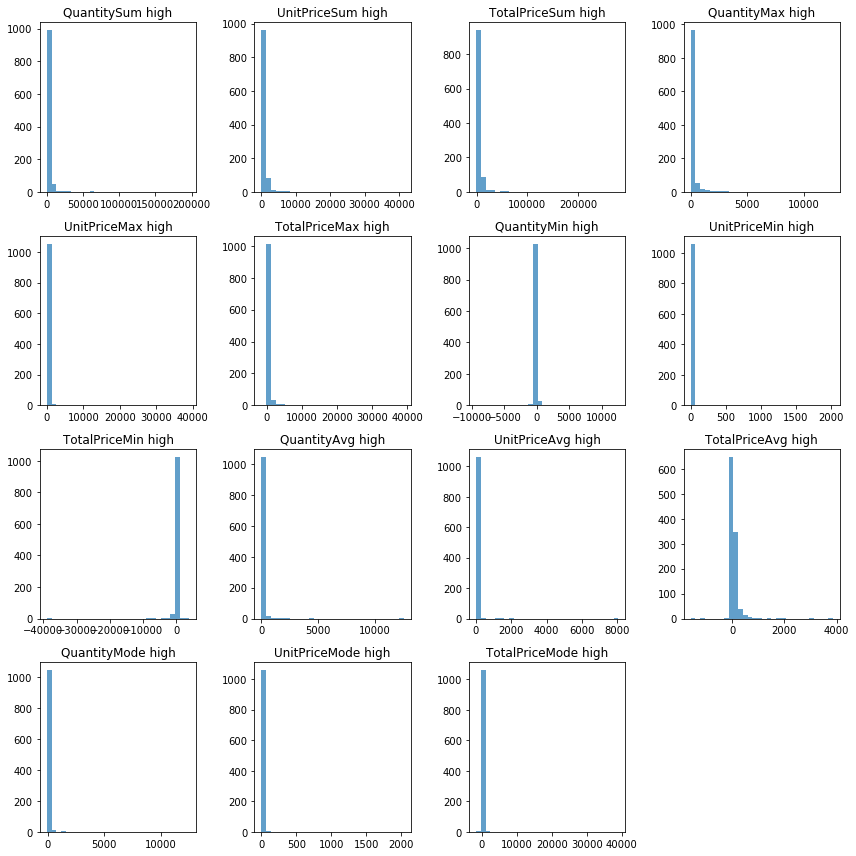

In [45]:
plt.figure(figsize=(3*sq, 3*sq))

for i, col in enumerate(number_columns, 1):
    plt.subplot(sq, sq, i)
    plt.hist(customers_high[col], bins=30, alpha=.7)
    plt.title(f'{col} high')

plt.tight_layout()
plt.show()

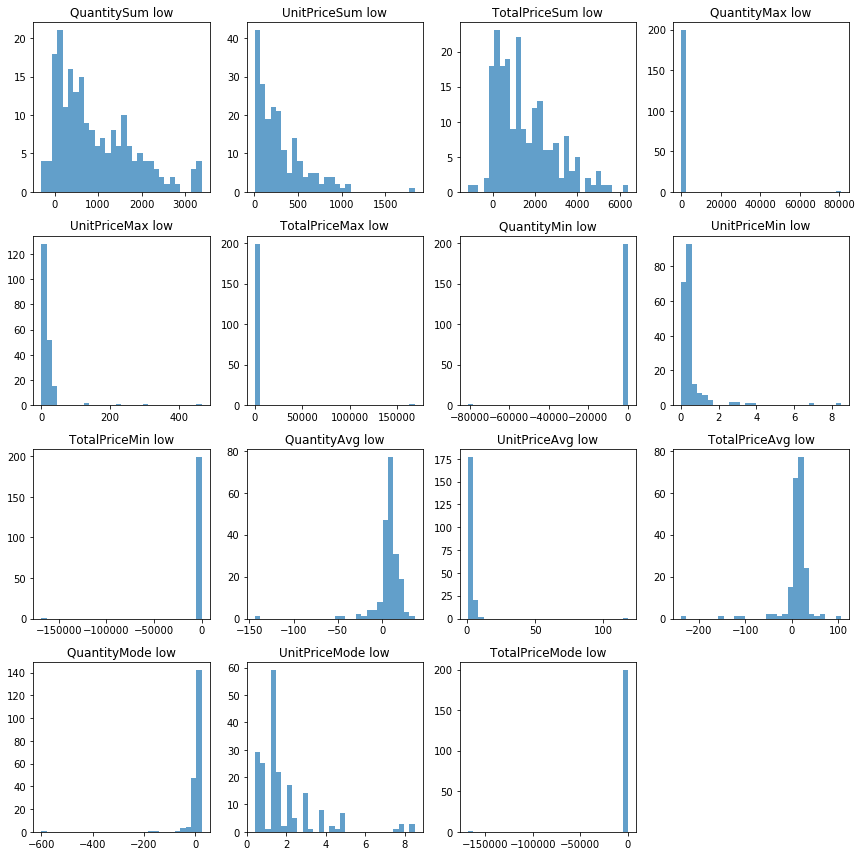

In [46]:
plt.figure(figsize=(3*sq, 3*sq))

for i, col in enumerate(number_columns, 1):
    plt.subplot(sq, sq, i)
    plt.hist(customers_low[col], bins=30, alpha=.7)
    plt.title(f'{col} low')

plt.tight_layout()
plt.show()

Since there are close to the same number of outliers as high-outliers, I believe it may be prudent to model both, separately. We'll simply drop the low-outliers

In [47]:
customers.columns

Index(['QuantitySum', 'UnitPriceSum', 'TotalPriceSum', 'QuantityMax',
       'LastOrderDate', 'UnitPriceMax', 'TotalPriceMax', 'QuantityMin',
       'FirstOrderDate', 'UnitPriceMin', 'TotalPriceMin', 'QuantityAvg',
       'UnitPriceAvg', 'TotalPriceAvg', 'QuantityMode', 'InvoiceDateMode',
       'UnitPriceMode', 'Country', 'TotalPriceMode', 'outlier'],
      dtype='object')

In [48]:
feature_columns = customers.columns.drop(['FirstOrderDate', 'LastOrderDate', 'InvoiceDateMode', 'outlier'])

X_mid = pd.get_dummies(customers_mid[feature_columns], columns=['Country'])
X_high = pd.get_dummies(customers_high[feature_columns], columns=['Country'])

In [49]:
X_mid.filter(like='Country').sum().sort_values(ascending=False)

Country_United Kingdom          2833
Country_France                    67
Country_Germany                   62
Country_Spain                     21
Country_Belgium                   18
Country_Portugal                  15
Country_Italy                     11
Country_Switzerland               11
Country_Australia                  6
Country_Sweden                     6
Country_Austria                    5
Country_Denmark                    5
Country_Poland                     5
Country_Finland                    5
Country_Netherlands                5
Country_Channel Islands            4
Country_Unspecified                4
Country_Norway                     4
Country_Cyprus                     2
Country_Canada                     2
Country_United Arab Emirates       2
Country_Japan                      2
Country_Israel                     1
Country_Greece                     1
Country_Lebanon                    1
Country_Malta                      1
Country_European Community         1
C

In [50]:
X_high.filter(like='Country').sum().sort_values(ascending=False)

Country_United Kingdom     941
Country_Germany             28
Country_France              15
Country_Spain                8
Country_Switzerland          7
Country_Belgium              6
Country_Norway               6
Country_Finland              6
Country_Japan                6
Country_Channel Islands      5
Country_Portugal             4
Country_Cyprus               4
Country_Austria              3
Country_Italy                3
Country_EIRE                 3
Country_Greece               3
Country_Netherlands          3
Country_Canada               2
Country_Denmark              2
Country_Australia            2
Country_Israel               2
Country_USA                  1
Country_Lithuania            1
Country_Malta                1
Country_Poland               1
Country_Brazil               1
Country_Singapore            1
Country_Bahrain              1
Country_Sweden               1
Country_Iceland              1
dtype: int64

In [59]:
country_drops = X_mid.filter(like='Country').columns.drop('Country_United Kingdom')
X_mid.drop(country_drops, axis=1, inplace=True)
country_drops = X_high.filter(like='Country').columns.drop('Country_United Kingdom')
X_high.drop(country_drops, axis=1, inplace=True)

In [60]:
from sklearn.preprocessing import StandardScaler

scaler_mid = StandardScaler()
X_mid_std = scaler_mid.fit_transform(X_mid)

scaler_high = StandardScaler()
X_high_std = scaler_high.fit_transform(X_high)

In [61]:
import umap

umap_mid = umap.UMAP(n_components=2, metric='euclidean', min_dist=.1)
X_umap_mid = umap_mid.fit_transform(X_mid_std)

umap_high = umap.UMAP(n_components=2, metric='euclidean', min_dist=.1)
X_umap_high = umap_high.fit_transform(X_high_std)

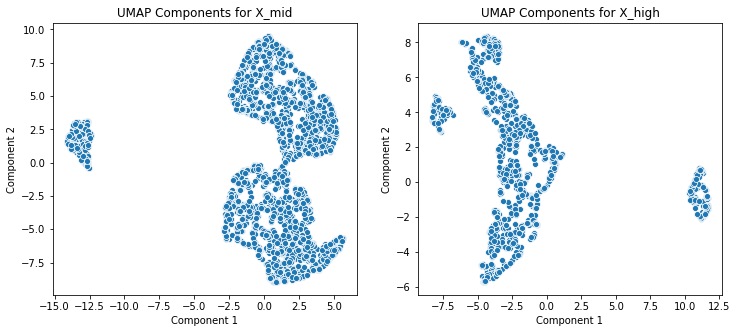

In [62]:
import seaborn as sns
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.scatterplot(X_umap_mid[:,0], X_umap_mid[:,1])
plt.title('UMAP Components for X_mid')
plt.xlabel(xlabel='Component 1')
plt.ylabel(ylabel='Component 2')

plt.subplot(122)
sns.scatterplot(X_umap_high[:,0], X_umap_high[:,1])
plt.title('UMAP Components for X_high')
plt.xlabel(xlabel='Component 1')
plt.ylabel(ylabel='Component 2')
plt.show()

In [71]:
from sklearn.cluster import KMeans

kmeans_mid = KMeans(n_clusters=8)
kmeans_preds_mid = kmeans_mid.fit_predict(X_mid_std)

kmeans_high = KMeans(n_clusters=8)
kmeans_preds_high = kmeans_high.fit_predict(X_high_std)

In [72]:
pd.DataFrame(X_mid_std, columns=X_mid.columns)

,QuantitySum,UnitPriceSum,TotalPriceSum,QuantityMax,UnitPriceMax,TotalPriceMax,QuantityMin,UnitPriceMin,TotalPriceMin,QuantityAvg,UnitPriceAvg,TotalPriceAvg,QuantityMode,UnitPriceMode,TotalPriceMode,Country_United Kingdom
0,-0.899213,-0.901884,-0.923000,55.654782,-0.177757,55.569738,-55.683247,-0.012781,-55.596604,-1.617062,-0.046059,-0.182465,55.703963,-0.032557,-55.615320,0.309287
1,-0.579782,-0.610086,-0.588036,-0.033481,0.307936,-0.031519,0.019893,-0.015226,0.027856,0.353193,-0.009999,0.067913,-0.015033,-0.018915,0.028115,-3.233245
2,-0.039832,0.294200,0.158221,-0.027476,0.020584,-0.021371,0.019893,-0.020759,0.027856,-0.063412,-0.001469,0.054418,-0.022542,-0.035003,0.022710,-3.233245
3,-0.510059,-0.659242,-0.462825,0.020563,-0.031775,0.026141,0.020643,-0.010079,0.034486,1.521806,-0.005331,0.267343,-0.019539,-0.007975,0.028331,-3.233245
4,0.989804,1.202040,1.743550,-0.024474,0.307936,0.054971,0.020643,-0.020759,0.025363,-0.081592,-0.013752,0.080203,-0.015033,-0.035003,0.017304,-3.233245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3099,-0.600861,-0.693398,-0.599094,-0.024474,-0.087874,0.011005,0.018392,-0.017799,0.017227,0.338191,-0.021431,0.074779,-0.015033,-0.029855,0.005449,0.309287
3100,-0.790574,-0.736646,-0.825205,-0.033481,-0.031775,-0.046078,0.018392,-0.022432,0.012543,-0.351342,-0.005266,-0.044389,-0.021792,0.030637,0.022818,0.309287
3101,-0.792195,-0.775093,-0.748806,-0.042488,-0.129013,-0.038943,0.022144,-0.015226,0.029081,-0.370234,-0.017181,0.063479,-0.015033,0.017767,0.031358,0.309287
3102,-0.811653,-0.729815,-0.842043,-0.042488,0.020584,-0.048133,0.019893,-0.020759,0.025363,-0.305463,0.012937,-0.035505,-0.015033,-0.040537,0.013586,0.309287


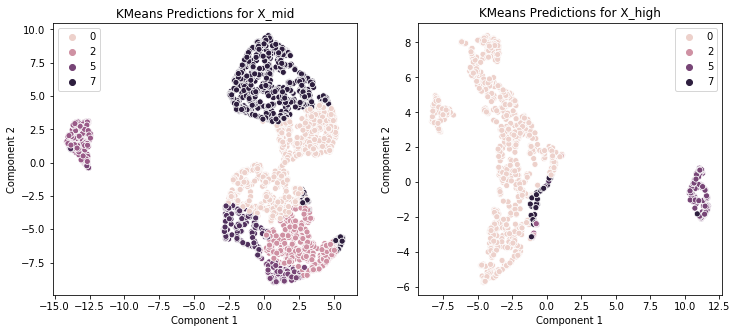

In [73]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.scatterplot(X_umap_mid[:,0], X_umap_mid[:,1], hue=kmeans_preds_mid)
plt.title('KMeans Predictions for X_mid')
plt.xlabel(xlabel='Component 1')
plt.ylabel(ylabel='Component 2')

plt.subplot(122)
sns.scatterplot(X_umap_high[:,0], X_umap_high[:,1], hue=kmeans_preds_high)
plt.title('KMeans Predictions for X_high')
plt.xlabel(xlabel='Component 1')
plt.ylabel(ylabel='Component 2')
plt.show()

In [74]:
print(pd.Series(kmeans_preds_mid).value_counts())
print(pd.Series(kmeans_preds_high).value_counts())

0    1000
7     981
2     487
4     249
6     209
5     176
3       1
1       1
dtype: int64
0    893
5    120
7     40
4      8
1      3
6      2
3      1
2      1
dtype: int64


In [66]:
from sklearn.cluster import DBSCAN

dbscan_mid = DBSCAN()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
methods = ['ward', 'complete', 'average']

for method in methods:
    plt.figure(figsize=(20,10))
    dendrogram(linkage(X_mid_std, method=method))
    plt.show()